coefficient of determination :  0.7305250573072464
slope :  [0.50762887]
intercept :  6.18144329896907


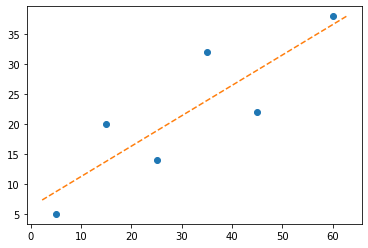

In [4]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, '--')

x = np.array([5, 15, 25, 35, 45, 60]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])
x_plot = []
y_plot = []
for i in x :
    x_plot.append(i[0])
reg = LinearRegression().fit(x, y)
print('coefficient of determination : ' ,reg.score(x, y))
print("slope : " ,reg.coef_)
print("intercept : " ,reg.intercept_)

plt.plot(x_plot,y,'o')
abline(reg.coef_,reg.intercept_)
plt.show()

coefficient of determination :  0.24456688961685802
slope :  [74.14307112]
intercept :  -23.01449070317839


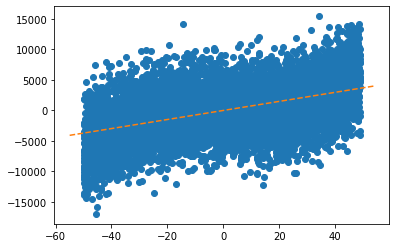

In [5]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, '--')

inline = open('./data/train.pkl','rb')
data = pickle.load(inline,encoding='bytes')
temp_x = []
temp_y = []
for i in data:
    temp_x.append(i[0])
    temp_y.append(i[1])

x= np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

reg = LinearRegression().fit(x, y)
print('coefficient of determination : ' ,reg.score(x, y))
print("slope : " ,reg.coef_)
print("intercept : " ,reg.intercept_)

plt.plot(temp_x,temp_y,'o')
abline(reg.coef_,reg.intercept_)
plt.show()

coefficient of determination :  0.24456688961685802
slope :  [74.14307112]
intercept :  -23.01449070317839
Bias :  18579.260015132386
Avg Prediction :  -177.8159553287809


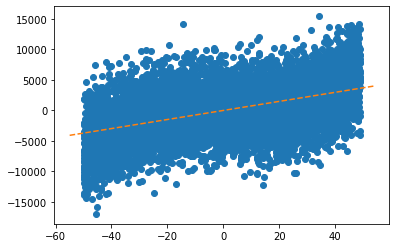

In [6]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

inline = open('./data/train.pkl','rb')
data = pickle.load(inline,encoding='bytes')
inline2 = open('./data/test.pkl','rb')
data2 = pickle.load(inline2,encoding='bytes')
temp_x = []
temp_y = []
temp_test_x = []
temp_test_y = []
for i in data:
    temp_x.append(i[0])
    temp_y.append(i[1])

for i in data2 : 
    temp_test_x.append(i[0])
    temp_test_y.append(i[1])

# print(temp_test_x)
# print(temp_test_y)

x = np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

test_x = np.array(temp_test_x).reshape(-1,1)

reg = LinearRegression().fit(x, y)
print('coefficient of determination : ' ,reg.score(x, y))
print("slope : " ,reg.coef_)
print("intercept : " ,reg.intercept_)

predicted_data = reg.predict(test_x)
bias = 0
avg_prediction = 0

# print(len(predicted_data))
# print(len(temp_test_y))

for i in range(0,len(temp_test_y)) : 
    bias += predicted_data[i] - temp_test_y[i]
    avg_prediction += predicted_data[i]

avg_prediction = avg_prediction/len(temp_test_y)

print("Bias : ", bias)
print("Avg Prediction : ",avg_prediction)

plt.plot(temp_x,temp_y,'o')
abline(reg.coef_,reg.intercept_)
plt.show()

coefficient of determination :  0.24456688961685802
slope :  [74.14307112]
intercept :  -23.01449070317839
Avg Prediction :  -177.8159553287809
Variance :  4772464.112267932


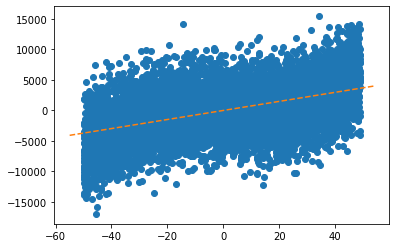

In [9]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle
import math

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

inline = open('./data/train.pkl','rb')
data = pickle.load(inline,encoding='bytes')
inline2 = open('./data/test.pkl','rb')
data2 = pickle.load(inline2,encoding='bytes')
temp_x = []
temp_y = []
temp_test_x = []
temp_test_y = []
for i in data:
    temp_x.append(i[0])
    temp_y.append(i[1])

for i in data2 : 
    temp_test_x.append(i[0])
    temp_test_y.append(i[1])

# print(temp_test_x)
# print(temp_test_y)

x = np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

test_x = np.array(temp_test_x).reshape(-1,1)

reg = LinearRegression().fit(x, y)
print('coefficient of determination : ' ,reg.score(x, y))
print("slope : " ,reg.coef_)
print("intercept : " ,reg.intercept_)

predicted_data = reg.predict(test_x)
bias = []
avg_prediction = 0
variance = 0

# print(len(predicted_data))
# print(len(temp_test_y))

for i in range(0,len(temp_test_y)) : 
    # bias.append(predicted_data[i] - temp_test_y[i])
    avg_prediction += predicted_data[i]

avg_prediction = avg_prediction/len(temp_test_y)

for i in range(0,len(temp_test_y)):
    bias.append(avg_prediction - temp_test_y[i])
    variance += math.pow((predicted_data[i] - avg_prediction),2)

variance = variance/len(temp_test_y)
# print("Bias : \n", bias)
print("Avg Prediction : ",avg_prediction)
print("Variance : ", variance)

plt.plot(temp_x,temp_y,'o')
# plt.plot(temp_test_x,temp_test_y,'o')
abline(reg.coef_,reg.intercept_)
plt.show()

[230.24621179021014, 226.51650899900687, -15.556092876568195, -13.838667901276162, -13.013400275446779, -13.298331370819174, -8.522288668634483, -13.11995449112222, -14.442911800314354, -18.175776106137103]
[259990.93009987712, 391058.3381326984, 560958.9320974448, 1149072.9152971406, 1514340.2784396247, 1742267.4795435392, 1988496.4047716178, 2215567.9094530353, 2329258.700080459, 2330462.641100266]


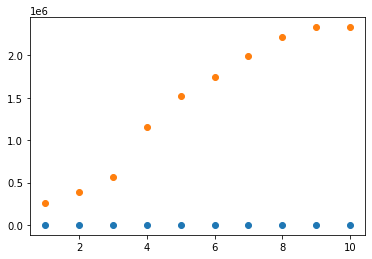

In [1]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pickle
import random
import math

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

inline = open('../Linear-Regression/data/train.pkl','rb')
data = pickle.load(inline,encoding='bytes')
inline2 = open('../Linear-Regression/data/test.pkl','rb')
data2 = pickle.load(inline2,encoding='bytes')
var = list(range(len(data)))
random.shuffle(var)
packets = len(data)/10
temp_x = []
temp_y = []
temp_test_x = []
temp_test_y = []
resampled_x = []
resampled_y = []
temp_kx = []
temp_ky = []

for i in range(0,len(data)):
    if((i+1)%packets == 0):
        temp_kx.append(data[i][0])
        temp_ky.append(data[i][1])
        resampled_x.append(temp_kx)
        resampled_y.append(temp_ky)
        temp_ky = []
        temp_kx = []
    else:
        temp_kx.append(data[i][0])
        temp_ky.append(data[i][1])

for i in data:
    temp_x.append(i[0])
    temp_y.append(i[1])

for i in data2 : 
    temp_test_x.append(i[0])
    temp_test_y.append(i[1])

x = np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

temp_test_x2 = np.array(temp_test_x).reshape(-1,1)

# reg = LinearRegression().fit(x, y)
# print('coefficient of determination : ' ,reg.score(x, y))
# print("slope : " ,reg.coef_)
# print("intercept : " ,reg.intercept_)

# polynomial part

# plt.plot(temp_x,temp_y,'o')

mean_bias = []
mean_variance = []
total_polynomials = 10

for i in range(1,total_polynomials+1):        # Polynomial loop
    poly_bias = []
    val_mean = 0
    val_variance = 0
    bias = [0 for k in range(1,total_polynomials+1)]
    for j in range(0,10):       # test case loop
        abc = np.array(resampled_x[j]).reshape(-1,1)
        poly_reg = PolynomialFeatures(degree=i)
        X_poly = poly_reg.fit_transform(abc)
        poly_reg.fit(X_poly,y)
        lin_reg = LinearRegression().fit(X_poly,resampled_y[j])
        # plt.plot(temp_test_x2, lin_reg.predict(poly_reg.fit_transform(temp_test_x2)),'o')
        predicted_value = lin_reg.predict(poly_reg.fit_transform(temp_test_x2))
        poly_bias.append(predicted_value)
        for k in range(0,len(predicted_value)):
            val_mean += predicted_value[k]
    val_mean = val_mean/10
    for k in  range(0,len(temp_test_y)):
        val_mean -= temp_test_y[k]
    val_mean = val_mean/len(temp_test_y)
    mean_bias.append(val_mean)
    # variance finding down
    for j in range(0,len(poly_bias[0])):
        temp = 0
        for k in range(0,10):
            temp += poly_bias[k][j]
        temp = temp/10
        for k in range(0,10):
            val_variance +=  math.pow((poly_bias[k][j] - temp),2)
    val_variance = val_variance/len(poly_bias[0])
    mean_variance.append(val_variance)

print(mean_bias)
print(mean_variance)
plt.plot([1,2,3,4,5,6,7,8,9,10],mean_bias,'o')
plt.plot([1,2,3,4,5,6,7,8,9,10],mean_variance,'o')
# plt.plot(temp_test_x2, lin_reg.predict(poly_reg.fit_transform(temp_test_x2)),'o', color='red')
# abline(reg.coef_,reg.intercept_)
plt.show()